In [1]:
import fg
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

o = fg.fg()
V = {}

In [2]:
matplotlib.rcParams['figure.figsize'] = (12,7)
matplotlib.rcParams['grid.alpha'] = 0.4
matplotlib.rcParams['font.family'] = 'monospace'

In [3]:
def voo(o, elev):
    o.restart()
    o.controle_on = 0
    o.lancamento = {'Elev': elev}
    v = o.run()
    return v

In [11]:
emax = -1.
amax = -1.
vmax = None

for e in np.arange(900., 1110., 4.):
    
    if e in V:
        v = V[e]
    else:
        v = voo(o, e)
        V[e] = v
        
    if v.alc.max() > amax:
        amax = v.alc.max()
        emax = e
        vmax = v

In [22]:
def graf(V, xname = 'alc', yname = 'h', kx = 1., ky = 1.):
    amax = -1
    vmax = None
    for e in V:
        v = V[e]
        plt.plot(v[xname].mul(kx), v[yname].mul(ky), label=f'elev: {e}', color='#002277', alpha=0.5, linewidth=0.5)
        
        if v[xname].max() > amax:
            amax = v.alc.max()
            vmax = v
    
    plt.plot(vmax[xname].mul(kx), vmax[yname].mul(ky), color='black', linewidth=3)
    plt.title(f'amax: {amax:.1f}, emax: {emax:.1f}')

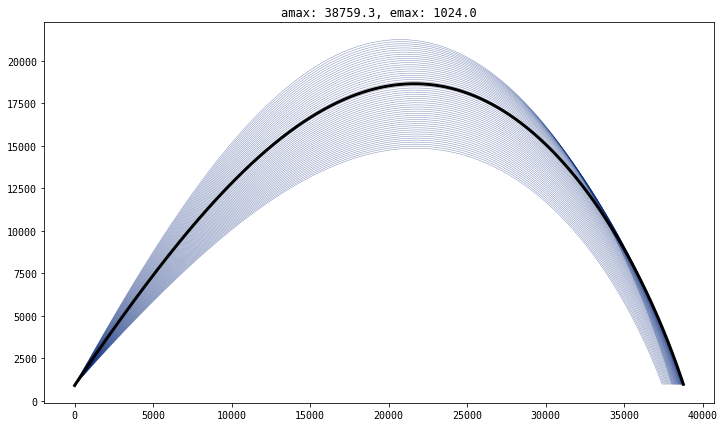

In [20]:
graf(V, xname='alc', yname='h')

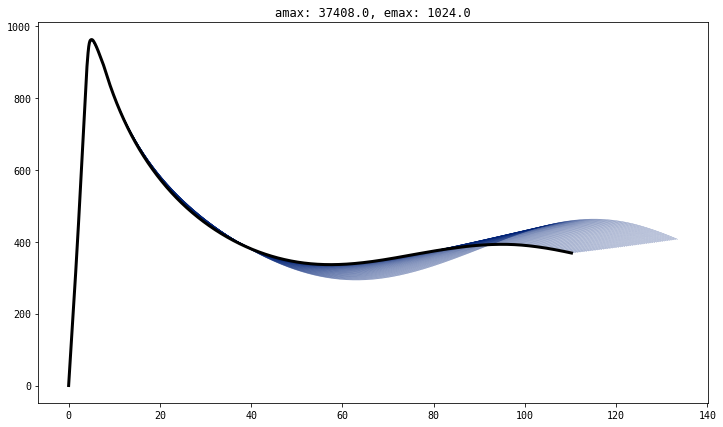

In [13]:
graf(V, xname='t', yname='vtot')

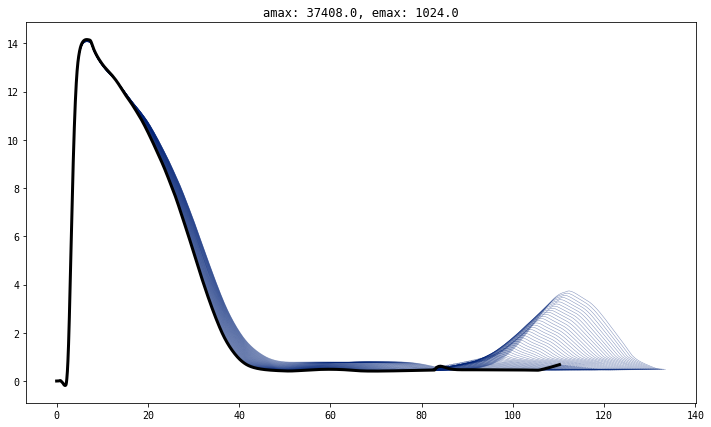

In [23]:
graf(V, xname='t', yname='p', ky=1/np.pi/2)

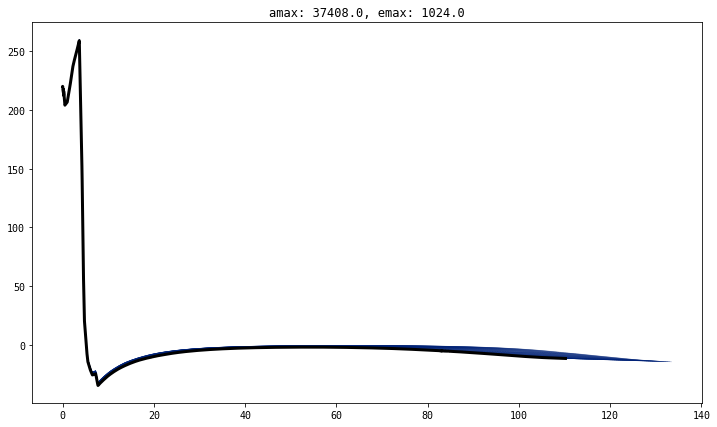

In [15]:
graf(V, xname='t', yname='acelx')